# All imports

In [1]:
import os,sys,string, time
print(sys.path)
print (sys.version)
from ipynb.fs.full.Utilities_neutrino import neutrino_energy
import ROOT
import seaborn as sns
from matplotlib.lines import Line2D
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import math
import matplotlib.pyplot as plt
import awkward 
import plotly.express as px
import numpy as np
import matplotlib.ticker as tck
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show    
import uproot3
import matplotlib.cm as cm
import matplotlib.mlab as mlab

import pandas as pd

from root_pandas import read_root
from platform import python_version

import scipy as sci
from scipy import stats
import scipy.optimize as op

['/uboone/app/users/finnerud/python_scripts', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/slf7.x86_64.e20.prof/lib', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/python', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/bin', '/cvmfs/larsoft.opensciencegrid.org/products/larbatch/v01_56_02/python', '/cvmfs/larsoft.opensciencegrid.org/products/larbatch/v01_56_02/bin', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/sam_web_client/v3_0/NULL/python', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/python_future_six_request/v1_3_1/Linux64bit-3-10-2-17-python3-9', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/jobsub_client/v1_3_5/NULL', '/cvmfs/uboone.opensciencegrid.org/products/swtrigger/v02_03_00d/Linux64bit+3.10-2.17/python', '/cvmfs/uboone.opensciencegrid.org/products/larlite/v06_71_00d/Linux64bit+3.10-2.17-e20-prof/python', '/cvmfs/uboone.opensciencegrid.org/products/larcv/v06_71_00d/Linux64bit+3.10-2.17-e20-prof

# Opening the MC and data files

In [2]:
#MC
loc_file = '/uboone/data/users/davidc/searchingfornues/v08_00_00_48/0928/run3/nslice/prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2.root'

#Data
data_file = '/uboone/data/users/davidc/searchingfornues/v08_00_00_41/cc0pinp/0617/nslice/data_bnb_peleeFilter_uboone_v08_00_00_41_pot_run3_G1_neutrinoselection_filt.root'

#EXT
EXT_file =   '/uboone/data/users/davidc/searchingfornues/v08_00_00_43/0702/run3/numupresel/data_extbnb_mcc9.1_v08_00_00_25_reco2_G_all_reco2.root'

MC_tree = uproot3.open(loc_file)['nuselection/NeutrinoSelectionFilter']
data_tree = uproot3.open(data_file)['nuselection/NeutrinoSelectionFilter']
EXT_tree = uproot3.open(EXT_file)['nuselection/NeutrinoSelectionFilter']

#Un-comment this line to see the variables available
#print(data_tree.keys())


# Converting the trees to dataframes

In [3]:
variable_MC = ['trk_energy_proton_v','crtveto', 'nslice','slnunhits', 'slnhits','trk_llr_pid_score_v', 'weightTune','weightSplineTimesTune','category','trk_sce_end_z_v','trk_sce_end_y_v','trk_sce_end_x_v','trk_distance_v','trk_len_v','trk_score_v','trk_sce_start_z_v','trk_sce_start_y_v','trk_sce_start_x_v','reco_nu_vtx_sce_x','reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z']
variable = ['trk_energy_proton_v', 'crtveto','trk_len_v', 'trk_distance_v','category','topological_score','trk_sce_end_z_v','trk_sce_end_y_v','trk_sce_end_x_v','pfp_generation_v','trk_score_v','trk_llr_pid_score_v','trk_sce_start_z_v','trk_sce_start_y_v','trk_sce_start_x_v','reco_nu_vtx_sce_x','reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z','crtveto','nslice','category']
dataframe = data_tree.pandas.df(variable,flatten=False)
EXT_frame = EXT_tree.pandas.df(variable,flatten=False)
MC_frame = MC_tree.pandas.df(variable_MC,flatten=False)

# Adding back cosmics

In [4]:
MC_frame.loc[(MC_frame['category']!=1)&(MC_frame['category']!=10)&(MC_frame['category']!=11)&(MC_frame['category']!=111)&(MC_frame['slnunhits']/MC_frame['slnhits']<0.2), 'category'] = 4

# Neutrino Energy

In [5]:
MC_frame = neutrino_energy(MC_tree,MC_frame)
EXT_frame = neutrino_energy(EXT_tree,EXT_frame)
data_frame = neutrino_energy(data_tree,dataframe)

# Genie Weighting

In [6]:
MC_frame['weightMC_frameC8'] = 1.0
MC_frame.loc[ MC_frame['weightTune'] <= 0, 'weightTune' ] = 1.
MC_frame.loc[ MC_frame['weightTune'] == np.inf, 'weightTune' ] = 1.
MC_frame.loc[ MC_frame['weightTune'] > 100, 'weightTune' ] = 1.
MC_frame.loc[ np.isnan(MC_frame['weightTune']) == True, 'weightTune' ] = 1.
MC_frame.loc[ MC_frame['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
MC_frame.loc[ MC_frame['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
MC_frame.loc[ MC_frame['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
MC_frame.loc[ np.isnan(MC_frame['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.

# Scaling and adding back cosmics

In [7]:
EXT_frame['category'] =  7

EXT_frame['weightSplineTimesTune'] = 1

EXT_frame['weight'] = EXT_frame['weightSplineTimesTune']/3.88

MC_frame['weight'] = MC_frame['weightSplineTimesTune']/6.291

In [13]:
MC_frame

,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,...,trk_len_v,trk_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,scaling
entry,,,,,,,,,,,,,,,,,,,,,
0,"[0.51529604, 0.33678943, 0.030543065]",0,1,987,1050,"[0.95081425, -0.7325396, 0.0404409]",1.225192,1.224627,2,"[890.6556, 903.36926, 850.8536]",...,"[121.25998, 62.083, 1.035088]","[0.9994736, 0.9554535, 0.31676278]","[850.40735, 850.2903, 850.92645]","[-3.8722866, -2.3939276, -2.3777194]","[245.80368, 246.0049, 245.51324]",245.823135,-3.698386,850.602417,8.826286e-01,6.291
1,"[0.67191607, 0.3765414, 0.16911992, 0.15535162...",0,1,1467,2285,"[0.9723389, 0.796861, -0.7361738, 0.6268964, 0...",1.000000,1.000000,2,"[331.67685, 173.68651, 150.23724, 8.620833, 92...",...,"[180.64252, 75.09592, 19.174286, 16.588932, 11...","[0.99999976, 0.9863499, 0.9319424, 0.9691491, ...","[168.67154, 138.5117, 138.29465, 17.513525, 10...","[61.91415, 50.019833, 52.116062, -90.55183, 11...","[69.97444, 57.433052, 57.55293, 73.394165, 52....",57.404594,51.709759,138.394623,1.495693e+00,6.291
2,"[0.48820892, 0.4380978, 0.131319, 0.084989086,...",0,1,1351,1917,"[0.9632473, -0.57427365, 0.47962004, 0.4173684...",1.000000,1.000000,2,"[384.56332, 398.25, 330.33414, 504.0516, 327.1...",...,"[111.43539, 93.61408, 12.454597, 5.929691, 2.3...","[0.99978393, 0.98679554, 0.35697067, 0.0064309...","[332.16943, 329.96152, 330.91318, 505.62524, 3...","[-19.58513, -19.11941, -18.844908, 112.75819, ...","[129.57109, 130.17145, 130.68806, 103.8036, 13...",130.166641,-16.443644,330.465637,1.191711e+00,6.291
3,"[0.13785644, 0.11533721, -3.4028235e+38]",0,1,252,337,"[-0.39393228, 0.44739553, -3.4028235e+38]",1.000000,1.000000,31,"[851.96936, 833.80084, -3.4028235e+38]",...,"[13.530597, 9.981717, -3.4028235e+38]","[0.03335793, 0.04489564, -1.0]","[846.63464, 839.2341, -3.4028235e+38]","[101.61163, 82.24001, -3.4028235e+38]","[166.46996, 164.62286, -3.4028235e+38]",165.739166,98.650780,843.795105,-3.402823e+38,6.291
4,[0.7621727],0,1,1394,1432,[0.98012227],1.200335,1.158162,2,[1036.8639],...,[216.762],[0.99999994],[825.626],[59.193893],[79.76639],79.811829,59.017601,825.818115,7.621727e-01,6.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447204,"[0.69343716, 0.5433771, 0.38394597, 0.32268468...",0,1,1826,3376,"[0.97112465, 0.96419686, 0.87273324, 0.8952565...",1.000000,1.000000,21,"[310.12613, 393.37833, 316.27197, 335.70044, 2...",...,"[189.13426, 131.58595, 77.63208, 57.714176, 20...","[0.9999998, 0.9999997, 0.0011957269, 0.9924966...","[211.25879, 327.86234, 243.20023, 353.66098, 2...","[-6.666149, -115.20501, -1.8509761, -61.329807...","[182.80766, 64.522964, 174.31279, 54.380985, 1...",182.836227,-6.335725,212.156418,2.389724e+00,6.291
447205,"[0.49947813, 0.402534, 0.21782598, 0.13339128]",0,1,562,1635,"[0.9207442, 0.9260954, -0.8726935, 0.43724176]",1.000000,1.000000,3,"[394.49854, 506.60602, 465.59085, 500.86017]",...,"[115.5065, 81.24634, 29.52501, 12.791679]","[0.99933934, 0.9968029, 0.9367843, 0.12275446]","[431.7575, 436.69778, 436.40176, 490.32602]","[111.92931, 89.861465, 89.2281, 78.92793]","[116.32414, 121.48965, 120.70749, 159.77647]",116.455681,112.117920,431.822052,1.253229e+00,6.291
447206,[0.14175335],0,1,37,936,[0.6847321],1.000000,1.000000,4,[464.11823],...,[14.189445],[0.47195178],[453.44867],[-99.22087],[156.95871],156.872101,-99.461136,453.534271,1.417533e-01,6.291


# Combining Montecarlo and EXT

In [8]:
df_MC = MC_frame.reset_index(drop=True)
df_EXT = EXT_frame.reset_index(drop=True)
parser = pd.io.parsers.base_parser.ParserBase({'usecols': None})
MC_EXT = pd.concat([df.set_axis(parser._maybe_dedup_names(df.columns), axis=1) for df in [df_MC, df_EXT]], ignore_index=True)

In [9]:
import pickle

In [26]:
MC_EXT

,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weightMC_frameC8,weight,topological_score,pfp_generation_v,crtveto.1,category.1
0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,"[0.97708136, -0.85184264, 0.48644587, -0.00845...",0.000014,0.000014,2,"[510.1461, 386.83078, 389.2392, 352.4755]",...,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
1,"[0.8449957, 0.14436722]",0,1,1214.0,1305.0,"[0.9724676, 0.53075284]",1.000000,1.000000,5,"[766.05597, 763.80176]",...,20.804905,117.408989,658.495789,0.989363,1.0,0.158957,NaN,NaN,NaN,NaN
2,[0.28305787],1,1,261.0,363.0,[0.832832],0.002161,0.002161,5,[484.9743],...,176.495483,-115.742126,475.319550,0.283058,1.0,0.000344,NaN,NaN,NaN,NaN
3,"[0.19251134, 0.08560522, 0.06595004, 0.04684397]",0,1,266.0,362.0,"[0.8201192, -0.3351684, -0.26662487, 0.043141223]",1.188386,1.151594,5,"[1036.7325, 1007.2889, 1013.783, 1015.3574]",...,125.800079,95.887047,1013.899048,0.390911,1.0,0.183054,NaN,NaN,NaN,NaN
4,"[0.32602406, 0.11520586]",0,1,0.0,648.0,"[0.87098354, 0.40471098]",1.181342,1.210325,4,"[213.6291, 235.423]",...,78.443840,50.530334,223.597870,0.441230,1.0,0.192390,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553943,"[0.5950342, 0.13037923]",1,1,NaN,NaN,"[0.9556206, 0.10563445]",NaN,1.000000,7,"[1036.5604, 942.9884]",...,152.881973,-71.269409,945.029175,0.725413,NaN,0.257732,0.419440,"[2, 2]",1.0,7.0
553944,"[0.2080826, 0.07132651]",1,1,NaN,NaN,"[0.61043614, 0.2788971]",NaN,1.000000,7,"[469.20065, 206.4684]",...,19.687311,-36.480705,458.290253,0.279409,NaN,0.257732,0.139338,"[2, 2]",1.0,7.0
553945,"[0.40579048, 0.09552178]",1,1,NaN,NaN,"[0.90434676, 0.43364692]",NaN,1.000000,7,"[321.9641, 351.70425]",...,45.169106,35.884785,347.263367,0.501312,NaN,0.257732,0.118061,"[2, 2]",1.0,7.0
553946,"[0.1498978, 0.036364816]",0,1,NaN,NaN,"[-0.42948735, -0.023881134]",NaN,1.000000,7,"[244.05258, 244.20683]",...,218.899551,-18.492901,243.980331,0.186263,NaN,0.257732,0.177769,"[2, 2]",0.0,7.0


In [10]:
MC_EXT.to_pickle('MC_EXT_unflattened1.pkl')

In [13]:
MC_EXT_unflattened_from_pickle = pd.read_pickle("MC_EXT_unflattened1.pkl")

In [14]:
MC_EXT_unflattened_from_pickle

,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weightMC_frameC8,weight,topological_score,pfp_generation_v,crtveto.1,category.1
0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,"[0.97708136, -0.85184264, 0.48644587, -0.00845...",0.000014,0.000014,2,"[510.1461, 386.83078, 389.2392, 352.4755]",...,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
1,"[0.8449957, 0.14436722]",0,1,1214.0,1305.0,"[0.9724676, 0.53075284]",1.000000,1.000000,5,"[766.05597, 763.80176]",...,20.804905,117.408989,658.495789,0.989363,1.0,0.158957,NaN,NaN,NaN,NaN
2,[0.28305787],1,1,261.0,363.0,[0.832832],0.002161,0.002161,5,[484.9743],...,176.495483,-115.742126,475.319550,0.283058,1.0,0.000344,NaN,NaN,NaN,NaN
3,"[0.19251134, 0.08560522, 0.06595004, 0.04684397]",0,1,266.0,362.0,"[0.8201192, -0.3351684, -0.26662487, 0.043141223]",1.188386,1.151594,5,"[1036.7325, 1007.2889, 1013.783, 1015.3574]",...,125.800079,95.887047,1013.899048,0.390911,1.0,0.183054,NaN,NaN,NaN,NaN
4,"[0.32602406, 0.11520586]",0,1,0.0,648.0,"[0.87098354, 0.40471098]",1.181342,1.210325,4,"[213.6291, 235.423]",...,78.443840,50.530334,223.597870,0.441230,1.0,0.192390,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553943,"[0.5950342, 0.13037923]",1,1,NaN,NaN,"[0.9556206, 0.10563445]",NaN,1.000000,7,"[1036.5604, 942.9884]",...,152.881973,-71.269409,945.029175,0.725413,NaN,0.257732,0.419440,"[2, 2]",1.0,7.0
553944,"[0.2080826, 0.07132651]",1,1,NaN,NaN,"[0.61043614, 0.2788971]",NaN,1.000000,7,"[469.20065, 206.4684]",...,19.687311,-36.480705,458.290253,0.279409,NaN,0.257732,0.139338,"[2, 2]",1.0,7.0
553945,"[0.40579048, 0.09552178]",1,1,NaN,NaN,"[0.90434676, 0.43364692]",NaN,1.000000,7,"[321.9641, 351.70425]",...,45.169106,35.884785,347.263367,0.501312,NaN,0.257732,0.118061,"[2, 2]",1.0,7.0
553946,"[0.1498978, 0.036364816]",0,1,NaN,NaN,"[-0.42948735, -0.023881134]",NaN,1.000000,7,"[244.05258, 244.20683]",...,218.899551,-18.492901,243.980331,0.186263,NaN,0.257732,0.177769,"[2, 2]",0.0,7.0


In [15]:
pd.set_option('display.max_columns', 28)
MC_EXT.head(28)

,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_distance_v,trk_len_v,trk_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weightMC_frameC8,weight,topological_score,pfp_generation_v,crtveto.1,category.1
0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,"[0.97708136, -0.85184264, 0.48644587, -0.00845...",0.000014,0.000014,2,"[510.1461, 386.83078, 389.2392, 352.4755]","[-19.997118, 36.14163, 46.669083, 38.4241]","[191.86433, 74.171196, 183.1608, 41.78976]","[1.2863978, 0.91023517, 131.94789, 0.8344643]","[225.28435, 49.573208, 7.8509026, 14.983087]","[1.0, 0.977825, 0.04143381, 0.99214214]","[343.43365, 341.72366, 382.99887, 343.0555]","[35.865448, 36.37529, 47.10988, 36.3076]","[54.77682, 53.646503, 178.48657, 53.242805]",53.900658,36.203041,342.578735,1.324713e+00,1.0,0.000002,NaN,NaN,NaN,NaN
1,"[0.8449957, 0.14436722]",0,1,1214.0,1305.0,"[0.9724676, 0.53075284]",1.000000,1.000000,5,"[766.05597, 763.80176]","[-50.159794, -59.829678]","[172.77446, 184.38004]","[0.02522888, 251.42586]","[251.01755, 14.638609]","[1.0, 0.12893765]","[658.4803, 766.0749]","[117.42739, -50.710724]","[20.797407, 173.2559]",20.804905,117.408989,658.495789,9.893629e-01,1.0,0.158957,NaN,NaN,NaN,NaN
2,[0.28305787],1,1,261.0,363.0,[0.832832],0.002161,0.002161,5,[484.9743],[-74.71621],[156.99121],[0.39855337],[46.15604],[0.9497203],[475.2939],[-115.369],[176.3382],176.495483,-115.742126,475.319550,2.830579e-01,1.0,0.000344,NaN,NaN,NaN,NaN
3,"[0.19251134, 0.08560522, 0.06595004, 0.04684397]",0,1,266.0,362.0,"[0.8201192, -0.3351684, -0.26662487, 0.043141223]",1.188386,1.151594,5,"[1036.7325, 1007.2889, 1013.783, 1015.3574]","[91.286476, 97.071045, 100.73542, 97.2452]","[131.77562, 127.248726, 124.27406, 123.6863]","[0.13770424, 0.9477862, 1.3170195, 0.9648733]","[23.915464, 6.003198, 3.8473663, 2.1467288]","[0.8901321, 0.87707525, 0.79998, 0.7876644]","[1014.02985, 1013.0858, 1013.48517, 1013.8959]","[95.88971, 96.39057, 97.059456, 96.52144]","[125.84299, 125.84486, 125.369865, 125.082184]",125.800079,95.887047,1013.899048,3.909106e-01,1.0,0.183054,NaN,NaN,NaN,NaN
4,"[0.32602406, 0.11520586]",0,1,0.0,648.0,"[0.87098354, 0.40471098]",1.181342,1.210325,4,"[213.6291, 235.423]","[117.41476, 46.92116]","[88.7466, 80.265305]","[10.511966, 3.8888946]","[58.73659, 9.9623375]","[0.9298709, 0.37225756]","[224.01839, 226.82915]","[60.914005, 51.90392]","[78.24254, 80.192444]",78.443840,50.530334,223.597870,4.412299e-01,1.0,0.192390,NaN,NaN,NaN,NaN
5,[0.12159548],0,1,61.0,132.0,[0.36115175],1.190165,1.826553,5,[42.37949],[-44.08135],[7.907328],[0.6754896],[10.923086],[0.9632189],[36.351948],[-37.715416],[1.4151009],1.207889,-38.343498,36.215904,1.215955e-01,1.0,0.290344,NaN,NaN,NaN,NaN
6,[0.9348713],0,1,1754.0,2055.0,[0.98479974],6.202965,6.202965,5,[1031.7047],[52.0289],[83.52715],[0.15200157],[289.26544],[1.0],[761.9512],[-6.1077104],[1.3888435],1.357146,-6.141214,761.806335,9.348713e-01,1.0,0.986006,NaN,NaN,NaN,NaN
7,"[0.31943852, 0.40311772, 0.35451356, 0.19879706]",0,1,1179.0,1690.0,"[0.9029334, 0.9317021, 0.94075125, 0.7980199]",1.000000,1.000000,21,"[1036.5089, 1036.3257, 1036.6923, 987.4873]","[-38.23469, -69.680984, -78.98957, -65.50329]","[19.93196, 29.51378, 24.593576, 5.5114]","[27.846855, 52.933064, 0.26436642, 7.3983474]","[56.72743, 81.44745, 67.75852, 25.26261]","[0.06527845, 0.9898965, 0.96607846, 0.082592845]","[992.3407, 978.26434, 969.03467, 972.8847]","[-65.51921, -112.94923, -81.00281, -76.23444]","[22.75659, 66.74123, 25.39159, 20.853903]",25.337120,-80.776207,969.163696,1.275867e+00,1.0,0.158957,NaN,NaN,NaN,NaN
8,[0.30110216],0,1,412.0,532.0,[-0.70134854],1.000000,1.000000,3,[549.27515],[31.193138],[87.574936],[0.10745369],[51.28667],[0.95219564],[589.1131],[51.722412],[62.64989],62.605404,51.730442,589.209839,3.011022e-01,1.0,0

# Flattening

In [27]:
MC_EXT = MC_EXT.apply(lambda x: x.explode() if x.name in ['trk_sce_end_z_v','trk_sce_end_y_v','trk_sce_end_x_v','trk_distance_v','trk_len_v','trk_score_v','trk_llr_pid_score_v','trk_sce_start_z_v','trk_sce_start_y_v','trk_sce_start_x_v','reco_nu_vtx_sce_x','reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z','topological_score'] else x).reset_index()

MC_EXT = MC_EXT.loc[:,~MC_EXT.columns.duplicated()]

In [28]:
MC_EXT = MC_EXT.apply(lambda x: x.explode() if x.name in ['trk_energy_proton_v'] else x).reset_index()
MC_EXT = MC_EXT.loc[:,~MC_EXT.columns.duplicated()]


In [14]:
#MC_EXT = MC_EXT.apply(lambda x: x.explode() if x.name in ['pfp_generation_v'] else x)
#MC_EXT = MC_EXT.loc[:,~MC_EXT.columns.duplicated()]

In [11]:
MC_EXT

,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,...,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weightMC_frameC8,weight,topological_score,pfp_generation_v,crtveto.1,category.1
0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,"[0.97708136, -0.85184264, 0.48644587, -0.00845...",0.000014,0.000014,2,"[510.1461, 386.83078, 389.2392, 352.4755]",...,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
1,"[0.8449957, 0.14436722]",0,1,1214.0,1305.0,"[0.9724676, 0.53075284]",1.000000,1.000000,5,"[766.05597, 763.80176]",...,20.804905,117.408989,658.495789,0.989363,1.0,0.158957,NaN,NaN,NaN,NaN
2,[0.28305787],1,1,261.0,363.0,[0.832832],0.002161,0.002161,5,[484.9743],...,176.495483,-115.742126,475.319550,0.283058,1.0,0.000344,NaN,NaN,NaN,NaN
3,"[0.19251134, 0.08560522, 0.06595004, 0.04684397]",0,1,266.0,362.0,"[0.8201192, -0.3351684, -0.26662487, 0.043141223]",1.188386,1.151594,5,"[1036.7325, 1007.2889, 1013.783, 1015.3574]",...,125.800079,95.887047,1013.899048,0.390911,1.0,0.183054,NaN,NaN,NaN,NaN
4,"[0.32602406, 0.11520586]",0,1,0.0,648.0,"[0.87098354, 0.40471098]",1.181342,1.210325,4,"[213.6291, 235.423]",...,78.443840,50.530334,223.597870,0.441230,1.0,0.192390,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553943,"[0.5950342, 0.13037923]",1,1,NaN,NaN,"[0.9556206, 0.10563445]",NaN,1.000000,7,"[1036.5604, 942.9884]",...,152.881973,-71.269409,945.029175,0.725413,NaN,0.257732,0.419440,"[2, 2]",1.0,7.0
553944,"[0.2080826, 0.07132651]",1,1,NaN,NaN,"[0.61043614, 0.2788971]",NaN,1.000000,7,"[469.20065, 206.4684]",...,19.687311,-36.480705,458.290253,0.279409,NaN,0.257732,0.139338,"[2, 2]",1.0,7.0
553945,"[0.40579048, 0.09552178]",1,1,NaN,NaN,"[0.90434676, 0.43364692]",NaN,1.000000,7,"[321.9641, 351.70425]",...,45.169106,35.884785,347.263367,0.501312,NaN,0.257732,0.118061,"[2, 2]",1.0,7.0
553946,"[0.1498978, 0.036364816]",0,1,NaN,NaN,"[-0.42948735, -0.023881134]",NaN,1.000000,7,"[244.05258, 244.20683]",...,218.899551,-18.492901,243.980331,0.186263,NaN,0.257732,0.177769,"[2, 2]",0.0,7.0


In [12]:
MC_EXT.to_pickle('MC_EXT_unflattened1.pkl')

In [18]:
MC_EXT_from_pickle_flattened = pd.read_pickle("MC_EXT_flattened1.pkl")

In [19]:
MC_EXT_from_pickle_flattened

,index,trk_energy_proton_v,crtveto,nslice,slnunhits,slnhits,trk_llr_pid_score_v,weightTune,weightSplineTimesTune,category,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_distance_v,...,trk_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,weightMC_frameC8,weight,topological_score,pfp_generation_v,crtveto.1,category.1
0,0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,0.977081,0.000014,0.000014,2,510.146088,-19.997118,191.864334,1.286398,...,1.0,343.433655,35.865448,54.776821,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
1,0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,-0.851843,0.000014,0.000014,2,386.83078,36.141628,74.171196,0.910235,...,0.977825,341.723663,36.37529,53.646503,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
2,0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,0.486446,0.000014,0.000014,2,389.239197,46.669083,183.160797,131.947891,...,0.041434,382.998871,47.109879,178.486572,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
3,0,"[0.78301007, 0.2951627, 0.100190446, 0.14634946]",0,1,1636.0,2142.0,-0.008454,0.000014,0.000014,2,352.475494,38.424099,41.789761,0.834464,...,0.992142,343.055511,36.307598,53.242805,53.900658,36.203041,342.578735,1.324713,1.0,0.000002,NaN,NaN,NaN,NaN
4,1,"[0.8449957, 0.14436722]",0,1,1214.0,1305.0,0.972468,1.000000,1.000000,5,766.055969,-50.159794,172.77446,0.025229,...,1.0,658.480286,117.427391,20.797407,20.804905,117.408989,658.495789,0.989363,1.0,0.158957,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334990,553945,"[0.40579048, 0.09552178]",1,1,NaN,NaN,0.433647,NaN,1.000000,7,351.704254,37.588814,36.25386,3.253809,...,0.084692,347.87796,36.310658,42.201057,45.169106,35.884785,347.263367,0.501312,NaN,0.257732,0.118061,"[2, 2]",1.0,7.0
1334991,553946,"[0.1498978, 0.036364816]",0,1,NaN,NaN,-0.429487,NaN,1.000000,7,244.052582,-29.845335,208.052292,0.305819,...,0.687553,244.21521,-18.70476,218.966858,218.899551,-18.492901,243.980331,0.186263,NaN,0.257732,0.177769,"[2, 2]",0.0,7.0
1334992,553946,"[0.1498978, 0.036364816]",0,1,NaN,NaN,-0.023881,NaN,1.000000,7,244.206833,-17.831175,219.198944,0.767221,...,0.92374,243.304733,-18.87277,218.989075,218.899551,-18.492901,243.980331,0.186263,NaN,0.257732,0.177769,"[2, 2]",0.0,7.0
1334993,553947,"[0.55478376, 0.14808914]",0,1,NaN,NaN,0.927472,NaN,1.000000,7,519.466125,115.339325,-0.327278,0.546421,...,0.999715,498.605469,53.230812,117.628914,118.028412,52.935871,498.746796,0.702873,NaN,0.257732,0.414155,"[2, 2]",0.0,7.0


# Make your selections here

In [10]:
reco_x = MC_EXT['reco_nu_vtx_sce_x']
reco_y = MC_EXT['reco_nu_vtx_sce_y']
reco_z = MC_EXT['reco_nu_vtx_sce_z']
trk_score_v = MC_EXT['trk_score_v']
trk_dis_v = MC_EXT['trk_distance_v']
neutrino_energy = MC_EXT['trk_energy_tot']




selection =  (neutrino_energy > 0) & (neutrino_energy < 1.6) & (trk_dis_v > -1000) & (trk_dis_v < 5) & (trk_score_v > 0.5) & (reco_x > 5) & (reco_x < 251) & (reco_y < 110) & (reco_y > -110)\
                & (reco_z < 986) & (reco_z > 20) & ((reco_z < 675) | (reco_z > 775))

MC_EXT = MC_EXT[selection]

# Plot the variables 

In [ ]:
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 31)
#MC_EXT.head(100)

# Plot the energy spectrums here and normalise

In [11]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

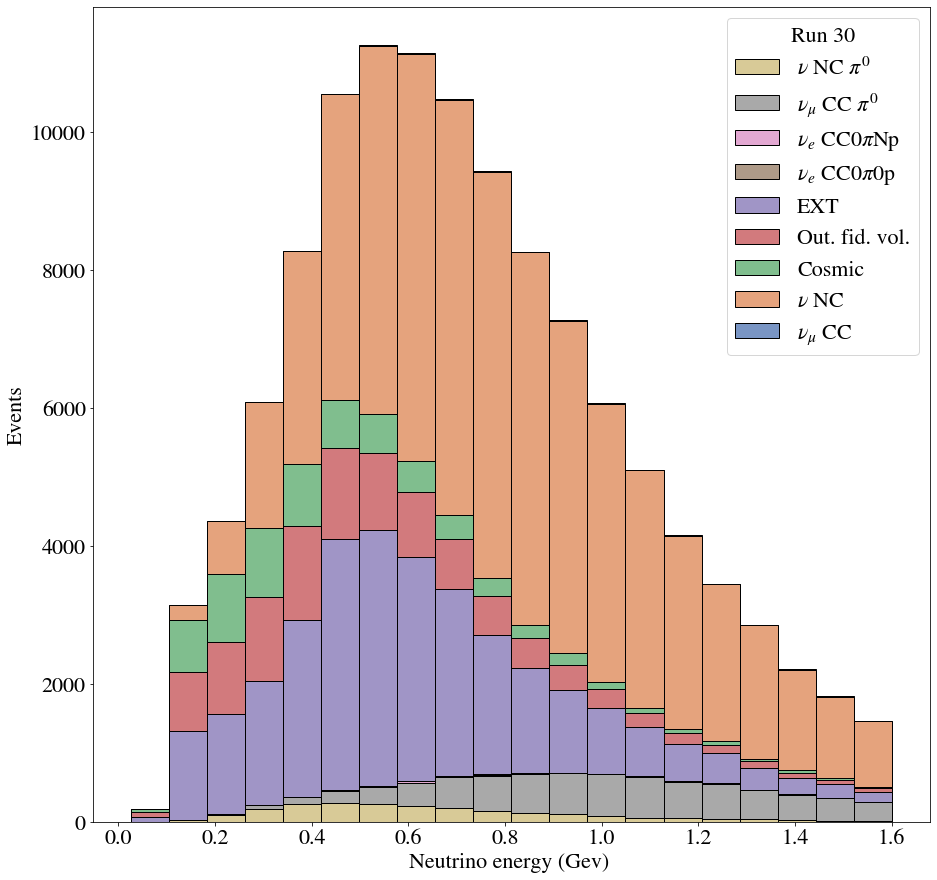

In [12]:
plt.figure(figsize=(15,15))
i = sns.histplot(data=MC_EXT, x="trk_energy_tot", hue="category", multiple="stack", palette = 'deep', legend = False, weights = MC_EXT['weightSplineTimesTune']/(MC_EXT['scaling']), bins = 20)
i.set(xlabel="Neutrino energy (Gev) ", ylabel = "Events")
plt.legend(title='Run 30', loc='upper right', labels=[r"$\nu$ NC $\pi^{0}$", r"$\nu_{\mu}$ CC $\pi^{0}$", r"$\nu_e$ CC0$\pi$Np", r"$\nu_e$ CC0$\pi$0p", r"EXT", r"Out. fid. vol.", r"Cosmic", r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC"])
plt.savefig('vertex_x1.jpg', dpi=300)
plt.show(i)

In [13]:
print('test')

test
